In [2]:
import pandas as pd
import numpy as np
import folium
import datetime
import time
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pylab as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from math import log
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import merged dataset
df1 = pd.read_csv('/content/sample_data/Merged_data_feb_aprl_2019_10mins.csv')

In [4]:
df1['trip_times'].isnull().sum()

23

In [5]:
df1 = df1[df1['trip_times'].notnull()]

In [6]:
df1

,pickup_bins,total_trips,trip_times,trip_distance,pickup_longitude,pickup_latitude,weekend,pickup_datetime,pickup_bins1_x,SPEED,pickup_community_area1,pickup_bins1_y,Measurement Timestamp,Air Temperature,Humidity,Rain Intensity,Total Rain,Wind Speed,Solar Radiation,pickup_times
0,1,1,58.000000,0.005000,-87.670167,42.009623,0,2019-02-01 00:15:00,1,25.500000,1.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
1,1,2,304.500000,0.835000,-87.695013,42.001571,0,2019-02-01 00:15:00,1,31.000000,2.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
2,1,3,694.000000,0.286667,-87.655879,41.965812,0,2019-02-01 00:15:00,1,21.000000,3.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
3,1,1,840.000000,0.200000,-87.683835,41.947792,0,2019-02-01 00:15:00,1,23.000000,5.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
4,1,10,386.300000,1.183000,-87.654307,41.943613,0,2019-02-01 00:15:00,1,23.714286,6.0,1,2019-02-01 00:10:00,-14.6,79.0,0.0,17.2,0.0,7.0,1.548980e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180094,4768,7,703.428571,2.902857,-87.625192,41.878866,0,2019-03-06 02:45:00,4768,17.000000,32.0,4768,2019-03-06 02:40:00,-10.3,64.0,0.0,13.0,3.4,6.0,1.551840e+09
180095,4768,1,0.000000,0.000000,-87.616134,41.763247,0,2019-03-06 02:45:00,4768,35.000000,69.0,4768,2019-03-06 02:40:00,-10.3,64.0,0.0,13.0,3.4,6.0,1.551840e+09
180096,6066,9,480.444444,2.655556,-87.627710,41.879575,0,2019-03-15 03:00:00,6066,27.000000,32.0,6066,2019-03-15 03:00:00,4.6,85.0,0.0,43.5,8.4,4.0,1.552619e+09
180097,6931,10,455.100000,2.320000,-87.625192,41.878866,0,2019-03-21 03:15:00,6931,25.000000,32.0,6931,2019-03-21 03:10:00,4.1,87.0,0.0,6.1,2.8,4.0,1.553138e+09


In [8]:
df2=df1[['pickup_bins','pickup_community_area1','total_trips','weekend','SPEED','Air Temperature','Total Rain','Solar Radiation']]
df2

,pickup_bins,pickup_community_area1,total_trips,weekend,SPEED,Air Temperature,Total Rain,Solar Radiation
0,1,1.0,1,0,25.500000,-14.6,17.2,7.0
1,1,2.0,2,0,31.000000,-14.6,17.2,7.0
2,1,3.0,3,0,21.000000,-14.6,17.2,7.0
3,1,5.0,1,0,23.000000,-14.6,17.2,7.0
4,1,6.0,10,0,23.714286,-14.6,17.2,7.0
...,...,...,...,...,...,...,...,...
180094,4768,32.0,7,0,17.000000,-10.3,13.0,6.0
180095,4768,69.0,1,0,35.000000,-10.3,13.0,6.0
180096,6066,32.0,9,0,27.000000,4.6,43.5,4.0
180097,6931,32.0,10,0,25.000000,4.1,6.1,4.0


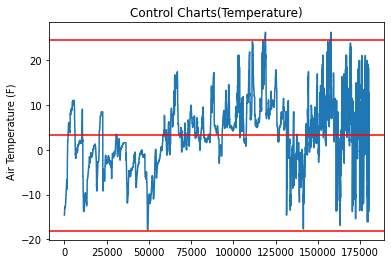

In [10]:
%matplotlib inline 
x=np.array(df2.index.tolist())
y1=np.array(df2['Air Temperature'])
f = plt.figure()

ax = f.add_subplot(111)

plt.plot(x, y1)
plt.axhline(y=df2['Air Temperature'].mean(),color='r')
plt.axhline(y=df2['Air Temperature'].mean()+3*df2['Air Temperature'].std(),color='r')
plt.axhline(y=df2['Air Temperature'].mean()-3*df2['Air Temperature'].std(),color='r')

plt.title('Control Charts(Temperature)', fontsize=12)
plt.ylabel('Air Temperature (F)') 

plt.show()

In [12]:
from statsmodels.stats.stattools import durbin_watson

In [11]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

Evaluation metric Adjusted R2, AIC, BIC

In [14]:
def adjusted_r(y_pred,y_test,p):
  r2 = 1 - np.sum((y_pred - y_test)**2) / np.sum((y_test - np.mean(y_pred))**2)
  N=y_test.shape[0]
  p=3
  x = (1-r2)
  y = (N-1) / (N-p-1)
  adj_rsquared = (1 - (x * y))
  return adj_rsquared


def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

# calculate bic for regression
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

In [ ]:
#X = df1[['pickup_bins','pickup_community_area1','weekend']]
#y = df1['total_trips']
#y=np.asarray(y)
#scaler = MinMaxScaler(feature_range=(0, 100))
#X=scaler.fit_transform(X)
#y=scaler.fit_transform(y)

# Linear Regression

Linear Regression using only Taxi Data

In [15]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,4,5,6,7], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df1=np.count_nonzero(regressor.coef_)


y_pred = regressor.predict(X_test)
#y_pred=[max(y_pred, 0) for y_pred in y_pred]
#y_pred = [round(value) for value in y_pred]

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI DATA')
print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('AIC:',calculate_aic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
print('BIC:',calculate_bic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
r2_sk = metrics.r2_score(y_test,y_pred)
print('R-squared error:',r2_sk)
N=y_test.shape[0]
p=3
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

TAXI DATA
          0
0 -0.000337
1 -0.027142
2 -0.014404
Mean Absolute Error: 4.181929799762768
Mean Squared Error: 64.308493428999
Root Mean Squared Error: 8.019257660718914
AIC: 149965.52074165837
BIC: 149990.9958973478
R-squared error: -0.001310992915841469
Adjusted-R2 :  -0.001394407693658506


In [16]:
test_df['Error']= test_df['Actual'] - test_df['Predicted']

Durbin Watoson test

In [17]:
durbinWatson = durbin_watson(test_df['Error'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
  print('Signs of positive autocorrelation', '\n')
  print('Assumption not satisfied')
elif durbinWatson > 2.5:
  print('Signs of negative autocorrelation', '\n')
  print('Assumption not satisfied')
else:
  print('Little to no autocorrelation', '\n')
  print('Assumption satisfied')

Durbin-Watson: 1.8748006777405855
Little to no autocorrelation 

Assumption satisfied


Linear Regression using TAXI and Traffic

In [38]:

#X = df1[['pickup_bins','pickup_community_area1','weekend','SPEED']]
#y = df1['total_trips']
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,5,6,7], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X=scaler.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df1=np.count_nonzero(regressor.coef_)

y_pred = regressor.predict(X_test)
#y_pred = [round(value) for value in y_pred]

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI + TRAFFIC')
print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('AIC:',calculate_aic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
print('BIC:',calculate_bic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
p=4
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

TAXI + TRAFFIC
          0
0  0.001271
1 -0.021922
2 -0.012824
3 -0.202023
Mean Absolute Error: 4.268362303438385
Mean Squared Error: 61.76391630598393
Root Mean Squared Error: 7.859002246213188
AIC: 148513.4684633109
BIC: 148547.4353375635
R- squared error: 0.03830917091850827
Adjusted-R2 :  0.03820234902196751


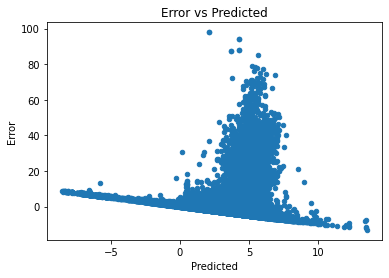

In [39]:
%matplotlib inline 
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Error',
    xlabel='Predicted'
)
plt.title('Error vs Predicted', fontsize=12)
#plt.ylim([test_df['Error'].min(), test_df['Error'].max()])
plt.show()

Linear Regression using taxi and weather

In [36]:
#X = df1[['pickup_bins','pickup_community_area1','weekend','SPEED']]
#y = df1['total_trips']
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,4], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X=scaler.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df1=np.count_nonzero(regressor.coef_)

y_pred = regressor.predict(X_test)
#y_pred = [round(value) for value in y_pred]

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI + WEATHER')
print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('AIC:',calculate_aic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
print('BIC:',calculate_bic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
p=6
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

TAXI + WEATHER
          0
0 -0.001846
1 -0.027477
2 -0.014068
3  0.003846
4  0.006212
5  0.007555
Mean Absolute Error: 4.135027673314786
Mean Squared Error: 64.10492051276431
Root Mean Squared Error: 8.006554846671838
AIC: 149857.32880378971
BIC: 149908.27911516858
R- squared error: 0.0018587252351641714
Adjusted-R2 :  0.0016924099348618604


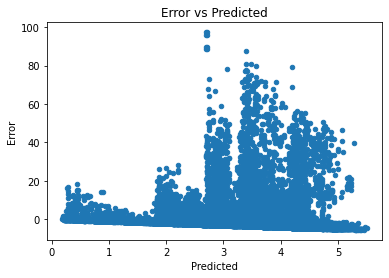

In [37]:
%matplotlib inline 
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Error',
    xlabel='Predicted'
)
plt.title('Error vs Predicted', fontsize=12)
#plt.ylim([test_df['Error'].min(), test_df['Error'].max()])
plt.show()

Linear Regression using Taxi, Traffic and Weather

In [34]:
#X = df1[['pickup_bins','pickup_community_area1','weekend','SPEED']]
#y = df1['total_trips']
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, 2, axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X=scaler.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df1=np.count_nonzero(regressor.coef_)

y_pred = regressor.predict(X_test)
#y_pred = [round(value) for value in y_pred]

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI + TRAFFIC + WEATHER')
print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('AIC:',calculate_aic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
print('BIC:',calculate_bic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
p=7
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

TAXI + TRAFFIC + WEATHER
          0
0  0.000166
1 -0.022317
2 -0.012531
3 -0.202245
4  0.000580
5  0.004341
6  0.008871
Mean Absolute Error: 4.211520941688979
Mean Squared Error: 61.51697032791507
Root Mean Squared Error: 7.8432754846374655
AIC: 148375.17978264578
BIC: 148434.6218125878
R- squared error: 0.04215422635849797
Adjusted-R2 :  0.04196801994838106


In [ ]:
test_df

,Actual,Predicted
0,0.096946,1.374474
1,0.096946,1.637179
2,0.339312,1.719709
3,0.048473,1.875443
4,0.096946,2.084437
...,...,...
15962,0.096946,2.619222
15963,0.436258,2.949454
15964,0.193892,1.937100
15965,0.048473,0.609914


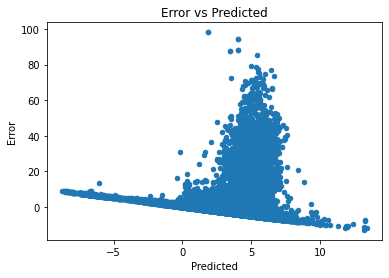

In [35]:
%matplotlib inline 
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Error',
    xlabel='Predicted'
)
plt.title('Error vs Predicted', fontsize=12)
#plt.ylim([test_df['Error'].min(), test_df['Error'].max()])
plt.show()

# Random Forest Model

Random Forest using taxi data

In [31]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,4,5,6,7], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=14,min_samples_split=15,n_estimators=100, n_jobs=-1)
regr1.fit(X_train, y_train)
y_pred = regr1.predict(X_test)
#y_pred = [round(value) for value in y_pred]

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI DATA')
#print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#print('AIC:',calculate_aic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
#print('BIC:',calculate_bic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
p=3
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

TAXI DATA
Mean Absolute Error: 1.7146952163146454
Mean Squared Error: 20.38555836447765
Root Mean Squared Error: 4.515036917288457
R- squared error: 0.7110116040656769
Adjusted-R2 :  0.7109955548017548


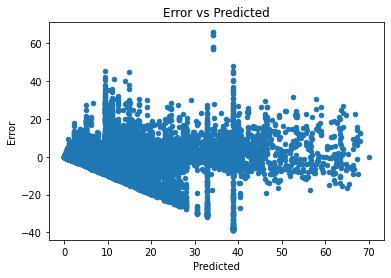

In [33]:
%matplotlib inline 
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Error',
    xlabel='Predicted'
)
plt.title('Error vs Predicted', fontsize=12)
#plt.ylim([test_df['Error'].min(), test_df['Error'].max()])
plt.show()

In [40]:
durbinWatson = durbin_watson(test_df['Error'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
  print('Signs of positive autocorrelation', '\n')
  print('Assumption not satisfied')
elif durbinWatson > 2.5:
  print('Signs of negative autocorrelation', '\n')
  print('Assumption not satisfied')
else:
  print('Little to no autocorrelation', '\n')
  print('Assumption satisfied')

Durbin-Watson: 1.8741246547590635
Little to no autocorrelation 

Assumption satisfied


Random Forest with Taxi and Traffic Data

In [43]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,5,6], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=1,min_samples_split=3,n_estimators=100, n_jobs=-1,bootstrap=False)
regr1.fit(X_train, y_train)
y_pred = regr1.predict(X_test)
y_pred=[max(y_pred, 0) for y_pred in y_pred]
#y_pred = [round(value) for value in y_pred]

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI + TRAFFIC')
#print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
p=4
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

TAXI + TRAFFIC
Mean Absolute Error: 1.5886412366108893
Mean Squared Error: 23.93253471405731
Root Mean Squared Error: 4.892088992859524
R- squared error: 0.6273601071997841
Adjusted-R2 :  0.6273187154147406


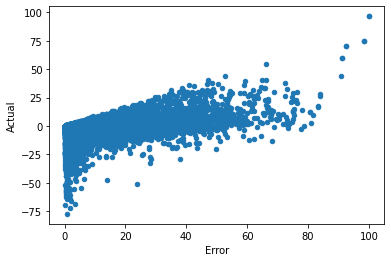

In [45]:
y_pred = regr1.predict(X_test)

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Actual', y='Error').set(
    ylabel='Actual',
    xlabel='Error',
)
plt.show()

Random Forest using Taxi and Weather

In [37]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,4], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=12,min_samples_split=9,n_estimators=100, n_jobs=-1)
regr1.fit(X_train, y_train)
y_pred = regr1.predict(X_test)
#y_pred = [round(value) for value in y_pred]

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI + WEATHER')
#print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared Error:', regr1.score(X,y))
p=6
print('adjusted R squared:',adjusted_r(y_pred,y_test,p))
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

TAXI + WEATHER
Mean Absolute Error: 1.6654323813487306
Mean Squared Error: 16.32015231956592
Root Mean Squared Error: 4.039820827656335
R squared Error: 0.8772882732109788
adjusted R squared: 0.7467777004503697
R- squared error: 0.7458881859565795
Adjusted-R2 :  0.7458458445729181


In [ ]:
df2

,pickup_bins,pickup_community_area1,total_trips,weekend,SPEED,Air Temperature,Total Rain,Solar Radiation
0,1,1.0,1,0,25.500000,-14.6,17.2,7.0
1,1,2.0,2,0,31.000000,-14.6,17.2,7.0
2,1,3.0,3,0,21.000000,-14.6,17.2,7.0
3,1,5.0,1,0,23.000000,-14.6,17.2,7.0
4,1,6.0,10,0,23.714286,-14.6,17.2,7.0
...,...,...,...,...,...,...,...,...
180094,4768,32.0,7,0,17.000000,-10.3,13.0,6.0
180095,4768,69.0,1,0,35.000000,-10.3,13.0,6.0
180096,6066,32.0,9,0,27.000000,4.6,43.5,4.0
180097,6931,32.0,10,0,25.000000,4.1,6.1,4.0


Random Forest using taxi, traffic and weather

In [43]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100,
n_jobs=-1,bootstrap=False)
regr1.fit(X_train, y_train)
y_pred = regr1.predict(X_test)
y_pred=[max(y_pred, 0) for y_pred in y_pred]
#y_pred = [round(value) for value in y_pred]

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI + TRAFFIC + WEATHER')
#print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared Error:', regr1.score(X,y))
p=7
print('adjusted R squared:',adjusted_r(y_pred,y_test,p))
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

TAXI + TRAFFIC + WEATHER
Mean Absolute Error: 1.3872933017424358
Mean Squared Error: 15.40404613876838
Root Mean Squared Error: 3.924798866027198
R squared Error: 0.9652303497604924
adjusted R squared: 0.760766257801819
R- squared error: 0.7601523545072468
Adjusted-R2 :  0.7601057278265523


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7307056806560515

TAXI + TRAFFIC + WEATHER


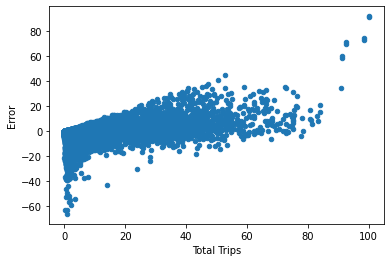

In [44]:
print('TAXI + TRAFFIC + WEATHER')
%matplotlib inline
y_pred = regr1.predict(X_test)

test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Actual', y='Error').set(
    ylabel='Error',
    xlabel='Total Trips',
)
plt.show()

In [132]:
test_df[test_df['Error']>70]

,Actual,Predicted,Error
6241,92.407407,20.233333,72.174074
6242,92.407407,20.566667,71.840741
6283,100.000000,7.390741,92.609259
6284,100.000000,5.942593,94.057407
21443,98.333333,23.140741,75.192593
21444,98.333333,23.090741,75.242593


In [139]:
X_test[6283:6284]


array([[ 65.28732042,   9.21052632, 100.        ,  50.        ,
         41.17647059,   0.80645161,   0.57142857]])

In [140]:
y_test[6283:6284]

array([100.])

In [154]:
df1[df1['pickup_bins']==8362]

,pickup_bins,total_trips,trip_times,trip_distance,pickup_longitude,pickup_latitude,weekend,pickup_datetime,pickup_bins1_x,SPEED,pickup_community_area1,pickup_bins1_y,Measurement Timestamp,Air Temperature,Humidity,Rain Intensity,Total Rain,Wind Speed,Solar Radiation,pickup_times
150351,8362,1,345.000000,1.450000,-87.695013,42.001571,1,2019-03-31 01:45:00,8362,25.000000,2.0,8362,2019-03-31 01:40:00,0.3,77.0,0.0,0.4,6.6,5.0,1.553996e+09
150352,8362,1,345.000000,1.450000,-87.695013,42.001571,1,2019-03-31 01:45:00,8362,25.000000,2.0,8362,2019-03-31 02:40:00,-0.9,70.0,0.0,0.4,5.2,5.0,1.553996e+09
150353,8362,1,576.000000,1.880000,-87.687516,41.975171,1,2019-03-31 01:45:00,8362,25.750000,4.0,8362,2019-03-31 01:40:00,0.3,77.0,0.0,0.4,6.6,5.0,1.553996e+09
150354,8362,1,576.000000,1.880000,-87.687516,41.975171,1,2019-03-31 01:45:00,8362,25.750000,4.0,8362,2019-03-31 02:40:00,-0.9,70.0,0.0,0.4,5.2,5.0,1.553996e+09
150355,8362,88,555.625000,2.554432,-87.654648,41.943889,1,2019-03-31 02:45:00,8362,28.500000,6.0,8362,2019-03-31 01:40:00,0.3,77.0,0.0,0.4,6.6,5.0,1.553996e+09
150356,8362,88,555.625000,2.554432,-87.654648,41.943889,1,2019-03-31 02:45:00,8362,28.500000,6.0,8362,2019-03-31 02:40:00,-0.9,70.0,0.0,0.4,5.2,5.0,1.553996e+09
150357,8362,46,529.468085,2.526596,-87.648245,41.922401,1,2019-03-31 02:45:00,8362,27.777778,7.0,8362,2019-03-31 01:40:00,0.3,77.0,0.0,0.4,6.6,5.0,1.553996e+09
150358,8362,46,529.468085,2.526596,-87.648245,41.922401,1,2019-03-31 02:45:00,8362,27.777778,7.0,8362,2019-03-31 02:40:00,-0.9,70.0,0.0,0.4,5.2,5.0,1.553996e+09
150359,8362,540,529.525735,1.978768,-87.632728,41.897210,1,2019-03-31 02:45:00,8362,28.000000,8.0,8362,2019-03-31 01:40:00,0.3,77.0,0.0,0.4,6.6,5.0,1.553996e+09
150360,8362,540,529.525735,1.978768,-87.632728,41.897210,1,2019-03-31 02:45:00,8362,28.000000,8.0,8362,2019-03-31 02:40:00,-0.9,70.0,0.0,0.4,5.2,5.0,1.553996e+09


In [152]:
df2[df2['total_trips']>539]

,pickup_bins,pickup_community_area1,total_trips,weekend,SPEED,Air Temperature,Total Rain,Solar Radiation
150359,8362,8.0,540,1,28.0,0.3,0.4,5.0
150360,8362,8.0,540,1,28.0,-0.9,0.4,5.0


Using RandomSearchCV to find hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 237, 425, 612, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, 2, axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=1, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 237, 425, 612,
                                                         800]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 85,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

# XGBoost Model

XGBoost using taxi data

In [46]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,4,5,6,7], axis=1)
y=np.asarray(y)
x_model = xgb.XGBRegressor(
 learning_rate =0.2,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

x_model.fit(X_train, y_train)
#coeff_df = pd.DataFrame(x_model.coef_, X.columns, columns=['Coefficient'])
#coeff_df1=np.count_nonzero(regressor.coef_)
y_pred = x_model.predict(X_test)
y_pred=[max(y_pred, 0) for y_pred in y_pred]
#y_pred = [round(value) for value in y_pred]
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI DATA')
#print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
p=3
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

[18:18:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TAXI DATA
Mean Absolute Error: 2.583748000782732
Mean Squared Error: 41.984201809606404
Root Mean Squared Error: 6.479521726918307
R- squared error: 0.3462878609157548
Adjusted-R2 :  0.3462334030567841


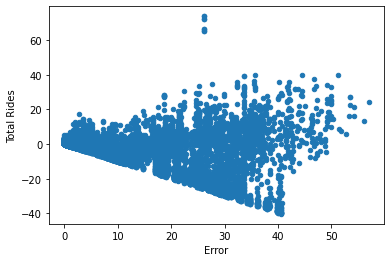

In [47]:
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Total Rides',
    xlabel='Error',
)
plt.show()

XGBoost using Taxi and Traffic data

In [48]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,5,6,7], axis=1)
y=np.asarray(y)
x_model = xgb.XGBRegressor(
 learning_rate =0.2,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

x_model.fit(X_train, y_train)
#coeff_df = pd.DataFrame(x_model.coef_, X.columns, columns=['Coefficient'])
#coeff_df1=np.count_nonzero(regressor.coef_)
y_pred = x_model.predict(X_test)
#y_pred = [round(value) for value in y_pred]
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI + TRAFFIC')
#print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
p=4
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

[18:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TAXI + TRAFFIC
Mean Absolute Error: 2.1667035891022546
Mean Squared Error: 36.97385425031566
Root Mean Squared Error: 6.080612983105869
R- squared error: 0.4243011344654749
Adjusted-R2 :  0.42423718746422134


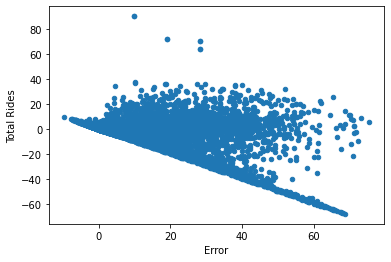

In [49]:
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Total Rides',
    xlabel='Error',
)
plt.show()

XGBoost using taxi and weather

In [50]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,4], axis=1)
y=np.asarray(y)
x_model = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

x_model.fit(X_train, y_train)
#coeff_df = pd.DataFrame(x_model.coef_, X.columns, columns=['Coefficient'])
#coeff_df1=np.count_nonzero(regressor.coef_)
y_pred = x_model.predict(X_test)
y_pred=[max(y_pred, 0) for y_pred in y_pred]
#y_pred = [round(value) for value in y_pred]
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI + WEATHER')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
p=6
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

[18:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TAXI + WEATHER
Mean Absolute Error: 2.1082934402055953
Mean Squared Error: 26.131128440812443
Root Mean Squared Error: 5.1118615435878585
R- squared error: 0.5931270541430165
Adjusted-R2 :  0.5930592589341759


XGBoost using Taxi, Traffic & Weather

In [51]:
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, 2, axis=1)
y=np.asarray(y)
x_model = xgb.XGBRegressor(
 learning_rate =0.2,
 n_estimators=1000,
 max_depth=16,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

x_model.fit(X_train, y_train)
#coeff_df = pd.DataFrame(x_model.coef_, X.columns, columns=['Coefficient'])
#coeff_df1=np.count_nonzero(regressor.coef_)
y_pred = x_model.predict(X_test)
y_pred=[max(y_pred, 0) for y_pred in y_pred]
#y_pred = [round(value) for value in y_pred]
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print('TAXI + TRAFFIC + WEATHER')
#print(coeff_df)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
p=7
#print('AIC:',calculate_aic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
#print('BIC:',calculate_bic(len(y_test), metrics.mean_squared_error(y_test, y_pred), coeff_df1))
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
N=y_test.shape[0]
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

[18:29:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TAXI + TRAFFIC + WEATHER
Mean Absolute Error: 1.4562438114964098
Mean Squared Error: 17.295238031460034
Root Mean Squared Error: 4.158754384603644
R- squared error: 0.7307056806560515
Adjusted-R2 :  0.7306533295053237


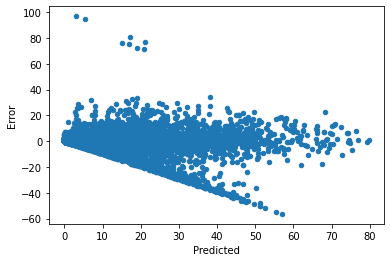

In [52]:
%matplotlib inline
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Error',
    xlabel='Predicted',
)
plt.show()

In [ ]:
df2=df1[['pickup_bins','pickup_community_area1','total_trips','weekend','SPEED','Air Temperature','Total Rain','Solar Radiation']]
df2

,pickup_bins,pickup_community_area1,total_trips,weekend,SPEED,Air Temperature,Total Rain,Solar Radiation
0,1,1.0,1,0,25.500000,-14.6,17.2,7.0
1,1,2.0,2,0,31.000000,-14.6,17.2,7.0
2,1,3.0,3,0,21.000000,-14.6,17.2,7.0
3,1,5.0,1,0,23.000000,-14.6,17.2,7.0
4,1,6.0,10,0,23.714286,-14.6,17.2,7.0
...,...,...,...,...,...,...,...,...
180094,4768,32.0,7,0,17.000000,-10.3,13.0,6.0
180095,4768,69.0,1,0,35.000000,-10.3,13.0,6.0
180096,6066,32.0,9,0,27.000000,4.6,43.5,4.0
180097,6931,32.0,10,0,25.000000,4.1,6.1,4.0


In [ ]:
df2.iloc[56:75]

,pickup_bins,pickup_community_area1,total_trips,weekend,SPEED,Air Temperature,Total Rain,Solar Radiation
56,28,6.0,6,0,23.538462,-13.7,17.5,7.0
57,28,7.0,5,0,28.444444,-13.7,17.5,7.0
58,28,8.0,18,0,23.500000,-13.7,17.5,7.0
59,28,14.0,2,0,28.333333,-13.7,17.5,7.0
60,28,15.0,1,0,24.125000,-13.7,17.5,7.0
61,28,24.0,1,0,24.250000,-13.7,17.5,7.0
62,28,28.0,1,0,23.583333,-13.7,17.5,7.0
63,28,32.0,3,0,24.736842,-13.7,17.5,7.0
64,28,43.0,1,0,30.000000,-13.7,17.5,7.0
65,28,56.0,2,0,27.615385,-13.7,17.5,7.0


# LSTM Model

LSTM using taxi data

In [46]:
print('TAXI DATA')
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,4,5,6,7], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_reshape =np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test_reshape=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

TAXI DATA
(144060, 3, 1)
(36016, 3, 1)
(144060,)
(36016,)


In [56]:
print('TAXI')
model_lstm1 = Sequential()
model_lstm1.add(LSTM(8, input_shape=(3, 1),dropout=0.1))
model_lstm1.add(Dense(1, activation="relu" ))
keras.backend.set_epsilon(1)

model_lstm1.compile(loss='mse', optimizer='adam',metrics=['RootMeanSquaredError','mae'])
history = model_lstm1.fit(X_train_reshape, y_train, epochs=100, batch_size=80, verbose=1)

TAXI
Epoch 1/100
1801/1801 [==============================] - 34s 3ms/step - loss: 94.5591 - root_mean_squared_error: 9.7241 - mae: 4.6166
Epoch 2/100
1801/1801 [==============================] - 7s 4ms/step - loss: 92.0014 - root_mean_squared_error: 9.5917 - mae: 4.7838
Epoch 3/100
1801/1801 [==============================] - 6s 3ms/step - loss: 90.3886 - root_mean_squared_error: 9.5073 - mae: 4.7341
Epoch 4/100
1801/1801 [==============================] - 6s 3ms/step - loss: 88.2847 - root_mean_squared_error: 9.3960 - mae: 4.7031
Epoch 5/100
1801/1801 [==============================] - 6s 3ms/step - loss: 85.5956 - root_mean_squared_error: 9.2518 - mae: 4.6307
Epoch 6/100
1801/1801 [==============================] - 6s 3ms/step - loss: 83.0429 - root_mean_squared_error: 9.1128 - mae: 4.6117
Epoch 7/100
1801/1801 [==============================] - 6s 3ms/step - loss: 81.3928 - root_mean_squared_error: 9.0218 - mae: 4.6125
Epoch 8/100
1801/1801 [==============================] - 6s 4ms

In [57]:
train_mae=min(history.history['mae'])
train_rmse=min(history.history['root_mean_squared_error'])
train_mae, train_rmse

(2.452989101409912, 6.1204986572265625)

In [ ]:
model_lstm1.save('/content/')

In [58]:
print('TAXI')
tr_scores = model_lstm1.evaluate(X_train_reshape, y_train, verbose=0)
print('Train score:', tr_scores) 

# Final evaluation of the model
test_scores = model_lstm1.evaluate(X_test_reshape, y_test, verbose=0)
print('Test score:', test_scores)

TAXI
Train score: [82.28992462158203, 9.071379661560059, 3.735062599182129]
Test score: [52.21395492553711, 7.225922584533691, 3.1661691665649414]


In [59]:
print('TAXI')
tr_scores = model_lstm1.evaluate(X_train_reshape, y_train, verbose=0)
print('Train score:', tr_scores) 

# Final evaluation of the model
test_scores = model_lstm1.evaluate(X_test_reshape, y_test, verbose=0)

print('Test score:', test_scores) 
y_pred=model_lstm1.predict(X_test_reshape, verbose=0, batch_size=1)



r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)
N=y_test.shape[0]
p=3
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

TAXI
Train score: [82.28992462158203, 9.071379661560059, 3.735062599182129]
Test score: [52.21395492553711, 7.225922584533691, 3.1661691665649414]
R- squared error: 0.18700554925241997
Adjusted-R2 :  0.1869378222905116


TAXI


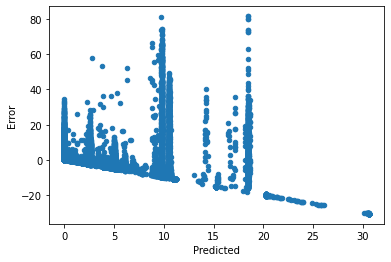

In [60]:
print('TAXI')
%matplotlib inline 
test_df = pd.DataFrame(y_pred, columns = ['Predicted'])
test_df['Actual'] = y_test
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Error',
    xlabel='Predicted',
)
#plt.ylim([test_df['Error'].min(), test_df['Error'].max()])
plt.show()

LSTM using Taxi and Traffic

In [61]:
print('TAXI + TRAFFIC')
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,5,6,7], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_reshape =np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test_reshape=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

TAXI + TRAFFIC
(144060, 4, 1)
(36016, 4, 1)
(144060,)
(36016,)


In [ ]:
print('TAXI + TRAFFIC')
model_lstm2 = Sequential()
model_lstm2.add(LSTM(8, input_shape=(4, 1),dropout=0.1))
model_lstm2.add(Dense(1, activation="relu" ))
keras.backend.set_epsilon(1)

model_lstm2.compile(loss='mse', optimizer='adam',metrics=['RootMeanSquaredError','mae'])
history = model_lstm2.fit(X_train_reshape, y_train, epochs=100, batch_size=80, verbose=2)

TAXI + TRAFFIC
Epoch 1/100
1801/1801 - 13s - loss: 93.6588 - root_mean_squared_error: 9.6777 - mae: 4.5708 - 13s/epoch - 7ms/step
Epoch 2/100
1801/1801 - 9s - loss: 89.1782 - root_mean_squared_error: 9.4434 - mae: 4.7179 - 9s/epoch - 5ms/step
Epoch 3/100
1801/1801 - 5s - loss: 84.6586 - root_mean_squared_error: 9.2010 - mae: 4.5437 - 5s/epoch - 3ms/step
Epoch 4/100
1801/1801 - 5s - loss: 74.9964 - root_mean_squared_error: 8.6600 - mae: 4.1501 - 5s/epoch - 3ms/step
Epoch 5/100
1801/1801 - 5s - loss: 66.1821 - root_mean_squared_error: 8.1352 - mae: 3.7530 - 5s/epoch - 3ms/step
Epoch 6/100
1801/1801 - 6s - loss: 60.5326 - root_mean_squared_error: 7.7803 - mae: 3.4979 - 6s/epoch - 3ms/step
Epoch 7/100
1801/1801 - 5s - loss: 56.5189 - root_mean_squared_error: 7.5179 - mae: 3.3124 - 5s/epoch - 3ms/step
Epoch 8/100
1801/1801 - 5s - loss: 53.2987 - root_mean_squared_error: 7.3006 - mae: 3.1673 - 5s/epoch - 3ms/step
Epoch 9/100
1801/1801 - 5s - loss: 51.4136 - root_mean_squared_error: 7.1703 - 

In [68]:
train_mae=min(history.history['mae'])
train_rmse=min(history.history['root_mean_squared_error'])
train_mae, train_rmse

(2.1990489959716797, 5.478190898895264)

In [ ]:
model_lstm2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 4)                 96        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [69]:
print('TAXI + TRAFFIC')
tr_scores = model_lstm2.evaluate(X_train_reshape, y_train, verbose=0)
print('Train score:', tr_scores) 

# Final evaluation of the model
test_scores = model_lstm2.evaluate(X_test_reshape, y_test, verbose=0)

print('Test score:', test_scores) 
y_pred=model_lstm2.predict(X_test_reshape, verbose=0, batch_size=1)
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)


TAXI + TRAFFIC
Train score: [58.185482025146484, 7.627940654754639, 3.3538362979888916]
Test score: [48.69071960449219, 6.977873802185059, 3.1653852462768555]
R- squared error: 0.24186427939147725


In [70]:
N=y_test.shape[0]
p=4
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.24178006782050065


TAXI+TRAFFIC


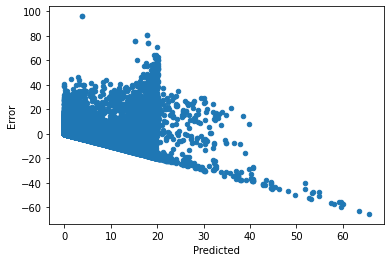

In [73]:
print('TAXI+TRAFFIC')
%matplotlib inline 
test_df = pd.DataFrame(y_pred, columns = ['Predicted'])
test_df['Actual'] = y_test
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Error',
    xlabel='Predicted',
)
#plt.ylim([test_df['Error'].min(), test_df['Error'].max()])
plt.show()

LSTM using taxi and weather data

In [74]:
print('TAXI+WEATHER')
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, [2,4], axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_reshape =np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test_reshape=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

TAXI+WEATHER
(144060, 6, 1)
(36016, 6, 1)
(144060,)
(36016,)


In [103]:
print('TAXI+WEATHER')
model_lstm3 = Sequential()
model_lstm3.add(LSTM(4, input_shape=(6, 1),dropout=0.1))
model_lstm3.add(Dense(1, activation="relu" ))
keras.backend.set_epsilon(1)

model_lstm3.compile(loss='mse', optimizer='adam',metrics=['RootMeanSquaredError','mae'])
history3 = model_lstm3.fit(X_train_reshape, y_train, epochs=100, batch_size=100, verbose=1)

TAXI+WEATHER
Epoch 1/100
1441/1441 [==============================] - 14s 6ms/step - loss: 95.8175 - root_mean_squared_error: 9.7886 - mae: 4.4175
Epoch 2/100
1441/1441 [==============================] - 9s 6ms/step - loss: 93.8487 - root_mean_squared_error: 9.6876 - mae: 4.7805
Epoch 3/100
1441/1441 [==============================] - 7s 5ms/step - loss: 93.2121 - root_mean_squared_error: 9.6546 - mae: 4.7847
Epoch 4/100
1441/1441 [==============================] - 7s 5ms/step - loss: 92.8367 - root_mean_squared_error: 9.6352 - mae: 4.7758
Epoch 5/100
1441/1441 [==============================] - 7s 5ms/step - loss: 92.5929 - root_mean_squared_error: 9.6225 - mae: 4.7812
Epoch 6/100
1441/1441 [==============================] - 7s 5ms/step - loss: 92.3556 - root_mean_squared_error: 9.6102 - mae: 4.7762
Epoch 7/100
1441/1441 [==============================] - 7s 5ms/step - loss: 92.0965 - root_mean_squared_error: 9.5967 - mae: 4.7622
Epoch 8/100
1441/1441 [==============================] 

In [92]:
train_mape=min(history3.history['mae'])
train_rmse=min(history3.history['root_mean_squared_error'])
train_mape, train_rmse

(2.2370758056640625, 5.791123867034912)

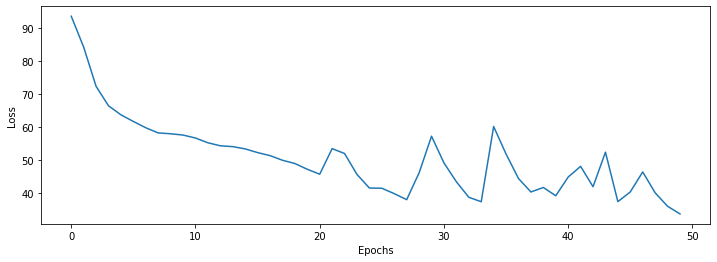

In [93]:
losses_lstm = history3.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
losses_lstm1=np.asarray(losses_lstm)

In [ ]:
model_lstm3.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 4)                 96        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [104]:
print('TAXI+WEATHER')
tr_scores = model_lstm3.evaluate(X_train_reshape, y_train, verbose=0)
print('Train score:', tr_scores) 

# Final evaluation of the model
test_scores = model_lstm3.evaluate(X_test_reshape, y_test, verbose=0)

print('Test score:', test_scores) 
y_pred=model_lstm3.predict(X_test_reshape, verbose=0, batch_size=1)
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)


TAXI+WEATHER
Train score: [101.65258026123047, 10.082290649414062, 4.456629276275635]
Test score: [73.84811401367188, 8.59349250793457, 3.848400354385376]
R- squared error: -0.1498477675453771


In [80]:
N=y_test.shape[0]
p=6
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.055538111270500345


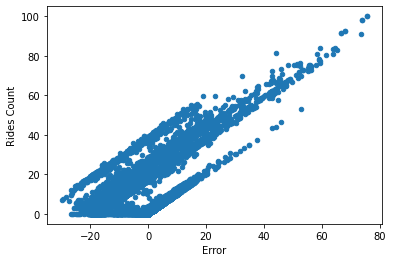

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.pyplot as plt
test_df = pd.DataFrame(y_pred, columns = ['Predicted'])
test_df['Actual'] = y_test
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Error', y='Actual').set(
    ylabel='Rides Count',
    xlabel='Error',
)
#plt.ylim([test_df['Error'].min(), test_df['Error'].max()])
plt.show()

LSTM using Taxi, Traffic and Weather data

In [110]:
print('TAXI+TRAFFIC+WEATHER')
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, 2, axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_reshape =np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test_reshape=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

TAXI+TRAFFIC+WEATHER
(144060, 7, 1)
(36016, 7, 1)
(144060,)
(36016,)


In [112]:
print('TAXI+TRAFFIC+WEATHER')
model_lstm3 = Sequential()
model_lstm3.add(LSTM(8, input_shape=(7, 1),dropout=0.1))
model_lstm3.add(Dense(1, activation="relu" ))
keras.backend.set_epsilon(1)

model_lstm3.compile(loss='mse', optimizer='adam',metrics=['RootMeanSquaredError','mae'])
history3 = model_lstm3.fit(X_train_reshape, y_train, epochs=100, batch_size=80, verbose=1)

TAXI+TRAFFIC+WEATHER
Epoch 1/100
1801/1801 [==============================] - 17s 7ms/step - loss: 94.3721 - root_mean_squared_error: 9.7145 - mae: 4.6655
Epoch 2/100
1801/1801 [==============================] - 10s 6ms/step - loss: 92.7407 - root_mean_squared_error: 9.6302 - mae: 4.7584
Epoch 3/100
1801/1801 [==============================] - 9s 5ms/step - loss: 87.7452 - root_mean_squared_error: 9.3672 - mae: 4.4213
Epoch 4/100
1801/1801 [==============================] - 10s 5ms/step - loss: 73.3768 - root_mean_squared_error: 8.5660 - mae: 3.7158
Epoch 5/100
1801/1801 [==============================] - 9s 5ms/step - loss: 63.0566 - root_mean_squared_error: 7.9408 - mae: 3.3333
Epoch 6/100
1801/1801 [==============================] - 9s 5ms/step - loss: 58.5044 - root_mean_squared_error: 7.6488 - mae: 3.1677
Epoch 7/100
1801/1801 [==============================] - 9s 5ms/step - loss: 56.6499 - root_mean_squared_error: 7.5266 - mae: 3.1007
Epoch 8/100
1801/1801 [======================

In [113]:
print('TAXI + TRAFFIC+ WEATHER')
tr_scores = model_lstm3.evaluate(X_train_reshape, y_train, verbose=0)
print('Train score:', tr_scores) 

# Final evaluation of the model
test_scores = model_lstm3.evaluate(X_test_reshape, y_test, verbose=0)

print('Test score:', test_scores) 
y_pred=model_lstm3.predict(X_test_reshape, verbose=0, batch_size=1)
r2_sk = metrics.r2_score(y_test,y_pred)
print('R- squared error:',r2_sk)


TAXI + TRAFFIC+ WEATHER
Train score: [77.98779296875, 8.831069946289062, 3.269270658493042]
Test score: [59.20703125, 7.694610595703125, 2.9610447883605957]
R- squared error: 0.07811991659109918


In [ ]:
N=y_test.shape[0]
p=7
x = (1-r2_sk)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.3260779894124599


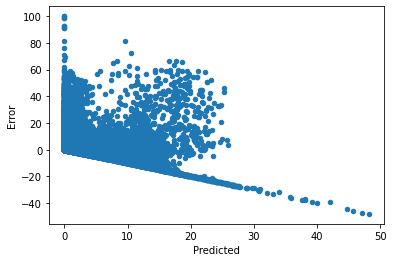

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.pyplot as plt
test_df = pd.DataFrame(y_pred, columns = ['Predicted'])
test_df['Actual'] = y_test
test_df['Error']= test_df['Actual'] - test_df['Predicted']
test_df.plot.scatter(x='Predicted', y='Error').set(
    ylabel='Error',
    xlabel='Predicted',
)
plt.show()

# Exploratory TCN model Implementation

In [ ]:
pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.0 MB/s 


In [ ]:
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# if time_steps > tcn_layer.receptive_field, then we should not
# be able to solve this task.
batch_size, time_steps, input_dim = None, 20, 7


def get_x_y(size=1000):
    import numpy as np
    pos_indices = np.random.choice(size, size=int(size // 2), replace=False)
    x_train = np.zeros(shape=(size, time_steps, 1))
    y_train = np.zeros(shape=(size, 1))
    x_train[pos_indices, 0] = 1.0  # we introduce the target in the first timestep of the sequence.
    y_train[pos_indices, 0] = 1.0  # the task is to see if the TCN can go back in time to find it.
    return x_train, y_train




In [ ]:
X_train, X_test, y_train, y_tes

In [ ]:
print('TAXI+TRAFFIC+WEATHER')
scaler = MinMaxScaler(feature_range=(0, 100))
df3 = scaler.fit_transform(df2)
y=[row[2] for row in df3]
X=np.delete(df3, 2, axis=1)
y=np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#X_train_reshape =np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
#X_test_reshape=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

TAXI+TRAFFIC+WEATHER
(144060, 7)
(36016, 7)
(144060,)
(36016,)


In [ ]:
tcn_layer = TCN(input_shape= (7,1))
# The receptive field tells you how far the model can see in terms of timesteps.
print('Receptive field size =', tcn_layer.receptive_field)

Receptive field size = 253


In [ ]:
model_lstm3.add(LSTM(4, input_shape=(7, 1)))

(1000, 20, 1)

In [ ]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
model = keras.models.Sequential([
        TCN(input_shape=(7, 1), nb_filters=64, return_sequences=True, dilations=[1, 2, 4, 8],activation='relu',kernel_initializer='he_normal',padding='same',use_skip_connections=True,kernel_size=6),
        keras.layers.Dense(1)
    ])

In [ ]:


#m = Sequential([
 #   tcn_layer,
  #  Dense(1),
#])
#m.add(kernel_size=2)
model.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError','mae','mape'])

tcn_full_summary(model, expand_residual_blocks=False)

#x, y = get_x_y()
model.fit(X_train, y_train, epochs=5)

Use tensorboard instead. Example in keras-tcn/tasks/tcn_tensorboard.py.
Epoch 1/5
4502/4502 [==============================] - 102s 22ms/step - loss: 98.8656 - root_mean_squared_error: 9.9432 - mae: 4.9752 - mape: 252.1779
Epoch 2/5
4502/4502 [==============================] - 95s 21ms/step - loss: 94.8593 - root_mean_squared_error: 9.7397 - mae: 4.7999 - mape: 239.3001
Epoch 3/5
4502/4502 [==============================] - 93s 21ms/step - loss: 94.6689 - root_mean_squared_error: 9.7299 - mae: 4.8318 - mape: 243.0912
Epoch 4/5
4502/4502 [==============================] - 98s 22ms/step - loss: 94.6689 - root_mean_squared_error: 9.7299 - mae: 4.8295 - mape: 242.8671
Epoch 5/5
4502/4502 [==============================] - 99s 22ms/step - loss: 94.6762 - root_mean_squared_error: 9.7301 - mae: 4.8241 - mape: 242.2684


In [ ]:
# Final evaluation of the model
test_scores = model.evaluate(X_test, y_test, verbose=0, )

print('Test score:', test_scores) 

Test score: [64.59416198730469, 4.23775053024292, 242.23834228515625]


In [ ]:
model = TCNModel(
    input_size=X_train.shape,
    n_epochs=20, 
    input_length=63870,
    output_length=7, 
    dropout=0, 
    dilation_base=2, 
    weight_norm=True,
    kernel_size=7,
    num_filters=4,
    random_state=0
)

NameError: ignored

In [ ]:
X_train.shape

(63870, 7)

In [ ]:
from darts.models import TCNModel

model = TCNModel(
    input_size=X_train.shape,
    n_epochs=20, 
    input_length=63870,
    output_length=7, 
    dropout=0, 
    dilation_base=2, 
    weight_norm=True,
    kernel_size=7,
    num_filters=4,
    random_state=0
)

model.fit(
    training_series=train_transformed,
    target_series=train_transformed['0'],
    val_training_series=val_transformed,
    val_target_series=val_transformed['0'], 
verbose=True
)